In [1]:
# import numpy
import numpy as np

In [2]:
array = np.array([1,2,3,4,5,6,7,8,9,10])

In [3]:
array

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [4]:
np.mean(array)

5.5

In [5]:
?np.percentile

Signature:
np.percentile(
    a,
    q,
    axis=None,
    out=None,
    overwrite_input=False,
    interpolation='linear',
    keepdims=False,
)
Docstring:
Compute the q-th percentile of the data along the specified axis.

Returns the q-th percentile(s) of the array elements.

Parameters
----------
a : array_like
    Input array or object that can be converted to an array.
q : array_like of float
    Percentile or sequence of percentiles to compute, which must be between
    0 and 100 inclusive.
axis : {int, tuple of int, None}, optional
    Axis or axes along which the percentiles are computed. The
    default is to compute the percentile(s) along a flattened
    version of the array.

    .. versionchanged:: 1.9.0
        A tuple of axes is supported
out : ndarray, optional
    Alternative output array in which to place the result. It must
    have the same shape and buffer length as the expected output,
    but the type (of the output) will be cast if necessary.
overwrite_input : b

In [6]:
#check for syntex here
np.percentile(array,25)

3.25

In [7]:
np.percentile(array,50)

5.5

In [8]:
np.percentile(array,75)

7.75

In [9]:
np.percentile(array,100)

10.0

In [10]:
# the above percentile vales can be calculated based on the formulas
# refer http://onlinestatbook.com/2/introduction/percentiles.html
# can refer http://onlinestatbook.com
# R = P/100 x (N + 1)

In [11]:
#Function to calculate lower range and upper range using 1.5 IQR rule
# 1. Ensure your column data is sorted in ascending order

In [12]:
def outlierDetection(data1):
    # 1. sort ascending
    sorted(data1) 
    # 2. calculate Q1 &Q3
    Q1,Q3 = np.percentile(data1,[25,75]) 
    # 3. Calculate IQR=Q3-Q1
    IQR=Q3-Q1
    # 4. Calculate lower rnge
    lowerRange = Q1-(1.5*IQR)
    # 5. Calculate Upper range
    upperRange = Q3+(1.5*IQR)
    # 6. Return ranges
    return lowerRange,upperRange

C:\Users\davea\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

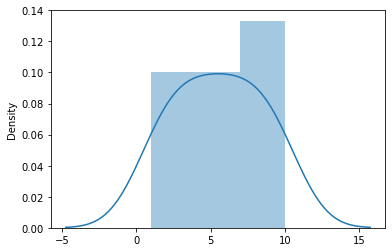

In [13]:
import seaborn as sns
%matplotlib inline
sns.distplot(array)

In [14]:
data1 = np.array([[1000],[2000],[6000],[4999],[2399],[50000],[2000000]])

In [15]:
data1 # 1*7

array([[   1000],
       [   2000],
       [   6000],
       [   4999],
       [   2399],
       [  50000],
       [2000000]])

In [16]:
# outlierDetection(data1)

C:\Users\davea\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

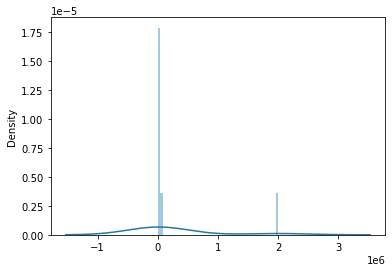

In [17]:
import seaborn as sns
%matplotlib inline
sns.distplot(data1)

In [18]:
# obviously its aright skew
# I can see Normal distribution ranges in the figure, but outliers also ca be seen
# newData = data1[(data1<=-36501.25) & (data1>=66700.75)]

In [19]:
#newData

In [20]:
# outlierDetection(newData)

In [21]:
lr,ur = outlierDetection(data1)

In [24]:
newData = data1[(data1>lr) & (data1<ur)]

In [25]:
newData

array([ 1000,  2000,  6000,  4999,  2399, 50000])

In [26]:
data1

array([[   1000],
       [   2000],
       [   6000],
       [   4999],
       [   2399],
       [  50000],
       [2000000]])

In [27]:
# last value (2000000) is remobed in new data

C:\Users\davea\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

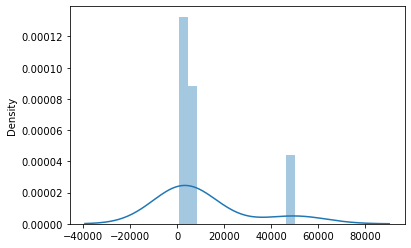

In [28]:
sns.distplot(newData)

In [29]:
lr1,ur1 = outlierDetection(newData)

In [30]:
newData1 = newData[(newData>lr1) & (newData<ur1)]

In [31]:
newData1

array([1000, 2000, 6000, 4999, 2399])

In [33]:
newData

array([ 1000,  2000,  6000,  4999,  2399, 50000])

In [34]:
# from the above data, another value is removed

In [35]:
# likewise we will loose the data..

C:\Users\davea\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

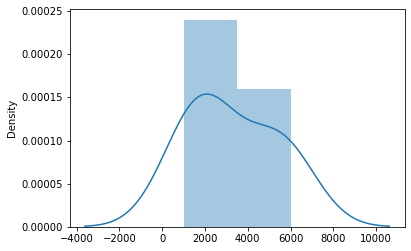

In [36]:
sns.distplot(newData1)

In [37]:
# now we can see normal distribution...thi is where we can stop the removal data as its following normal distribution

In [38]:
# lr2,ur2 = outlierDetection(newData1)

In [41]:
# newData2 = newData1[(newData1>lr2) & (newData<ur2)]

In [48]:
# check for mean and median
mean = np.mean(newData1)

In [53]:
mean

3279.6

In [49]:
median = np.median(newData1)

In [54]:
median

2399.0

In [50]:
# check for mean and median differnce , it should be @% buffer

In [51]:
diff = mean - median

In [52]:
diff

880.5999999999999

#### in real world problems, we will deal with tera and giga bytes of data, so removal of data this way is very is for accuracy of the model.

#### but here we are loosing the data for accuracy of the model, because of this we will loose the information / insight of the data from this removal technique..
# because here, we have very less data, removal dta is not a good option, instead go for the given data end up with a bad model ..its ok

In [55]:
# in large data set , iterate the steps till we get bell curve

C:\Users\davea\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

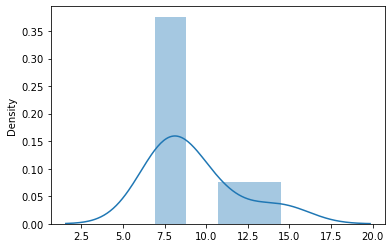

In [56]:
#Just check for log transformation
sns.distplot(np.log(data1))

C:\Users\davea\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

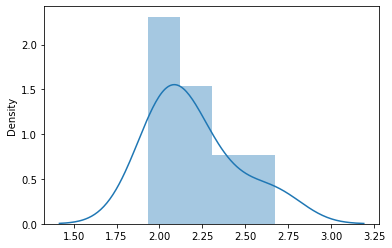

In [57]:
sns.distplot(np.log(np.log(data1)))

In [58]:
# see the magic of data...without loosing the data info...

C:\Users\davea\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

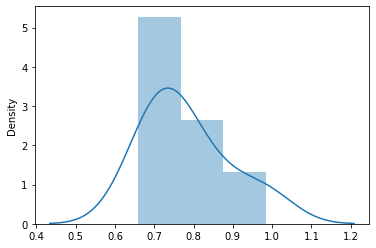

In [59]:
sns.distplot(np.log(np.log(np.log(data1))))

In [ ]:
# statistics is the emotions of the data